- [Task A - Pre Processing](#Task-A---Pre-Processing)
 - [Checking missing values](#Checking-if-datasets-have-missing-values)
 - [Handling categorical data](#Handling-categorical-data)
 - [Encoding class labels](#Encoding-class-labels)
 - [Partitioning datasets](#Partitioning-datasets-in-training-and-test-sets)
 - [Rank features](#Rank-features)
   - [1. Univariate Feature Selection](#1.-Univariate-Feature-Selection)
     - [1.1 Mutual Info Classif](#1.1-Mutual-Info-Classif)
     - [1.2 Chi-squared](#1.2-Chi-squared)
 - [Dimension reduction](#Dimension-reduction)
- [Task B - Predictive Model](#Task-B---Predictive-Model)


In [1]:
import pandas as pd
import numpy as np
import xlrd
import copy
%matplotlib inline

In [2]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Reading datasets

In [3]:
# Banknotes dataset

df_bankNotes = pd.read_excel('./data_banknote_authentication.xlsx')
#df_bankNotes

In [4]:
# Nursery dataset

df_nursery = pd.read_excel('./nursery.xlsx')
#df_nursery

# Task A - Pre Processing

## Checking if datasets have missing values

In [5]:
# Banknotes dataset

df_bankNotes.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

In [6]:
# Nursery dataset

df_nursery.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

## Handling categorical data

### Mapping ordinal features

In [7]:
# Nursery dataset

# print features before mapping
#df_nursery[df_nursery.columns[0:8]]

In [8]:
# Nursery dataset

# get dataset copy
df_nursery_copy = df_nursery.copy()

# cast data to string
df_nursery_copy = df_nursery_copy.astype(str)

# map features
parents_mapping = {'usual':1, 'pretentious':2, 'great_pret':3}
df_nursery_copy['parents'] = df_nursery_copy['parents'].map(parents_mapping)

has_nurs_mapping = {'proper':1, 'less_proper':2, 'improper':3, 'critical':4, 'very_crit':5}
df_nursery_copy['has_nurs'] = df_nursery_copy['has_nurs'].map(has_nurs_mapping)

form_mapping = {'complete':1, 'completed':2, 'incomplete':3, 'foster':4}
df_nursery_copy['form'] = df_nursery_copy['form'].map(form_mapping)

children_mapping = {'1':1, '2':2, '3':3, 'more':4}
df_nursery_copy['children'] = df_nursery_copy['children'].map(children_mapping)

housing_mapping = {'convenient':1, 'less_conv':2, 'critical':3}
df_nursery_copy['housing'] = df_nursery_copy['housing'].map(housing_mapping)

finance_mapping = {'convenient':1, 'inconv':2}
df_nursery_copy['finance'] = df_nursery_copy['finance'].map(finance_mapping)

social_mapping = {'nonprob':1, 'slightly_prob':2, 'problematic':3}
df_nursery_copy['social'] = df_nursery_copy['social'].map(social_mapping)

health_mapping = {'recommended':1, 'priority':2, 'not_recom':3}
df_nursery_copy['health'] = df_nursery_copy['health'].map(health_mapping)

In [9]:
# Nursery dataset

# print features after mapping
df_nursery_copy[df_nursery_copy.columns[0:8]]

,parents,has_nurs,form,children,housing,finance,social,health
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,3
3,1,1,1,1,1,1,2,1
4,1,1,1,1,1,1,2,2
5,1,1,1,1,1,1,2,3
6,1,1,1,1,1,1,3,1
7,1,1,1,1,1,1,3,2
8,1,1,1,1,1,1,3,3
9,1,1,1,1,1,2,1,1


## Encoding class labels

In [10]:
# Nursery dataset

# print labels before encoding
#df_nursery_copy[df_nursery_copy.columns[8]]

In [11]:
# Nursery dataset

class_mapping = {label:idx for idx,label in enumerate(np.unique(df_nursery_copy[df_nursery_copy.columns[8]]))}

class_mapping

{'not_recom': 0,
 'priority': 1,
 'recommend': 2,
 'spec_prior': 3,
 'very_recom': 4}

In [12]:
# Nursery dataset

# map labels
df_nursery_copy[df_nursery_copy.columns[8]] = df_nursery_copy[df_nursery_copy.columns[8]].map(class_mapping)

In [13]:
# Nursery dataset

# print labels after encoding
df_nursery_copy[df_nursery_copy.columns[8]]

0        2
1        1
2        0
3        2
4        1
5        0
6        1
7        1
8        0
9        4
10       1
11       0
12       4
13       1
14       0
15       1
16       1
17       0
18       4
19       1
20       0
21       4
22       1
23       0
24       1
25       1
26       0
27       4
28       1
29       0
        ..
12930    3
12931    3
12932    0
12933    3
12934    3
12935    0
12936    3
12937    3
12938    0
12939    3
12940    3
12941    0
12942    3
12943    3
12944    0
12945    3
12946    3
12947    0
12948    3
12949    3
12950    0
12951    3
12952    3
12953    0
12954    3
12955    3
12956    0
12957    3
12958    3
12959    0
Name: class, Length: 12960, dtype: int64

## Partitioning datasets in training and test sets

In [14]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

In [15]:
# Banknotes dataset

# labels reading
y1=df_bankNotes[df_bankNotes.columns[4]]
# features reading
X1=df_bankNotes[df_bankNotes.columns[0:4]]

# get training and test sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.3)

In [16]:
# Nursery dataset

# labels reading
y2=df_nursery_copy[df_nursery_copy.columns[8]]
# features reading
X2=df_nursery_copy[df_nursery_copy.columns[0:8]]

# get training and test sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.3)

## Rank features

### 1. Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like **chi-squared test, F-1 test, and mutual information** methods.
Can't use the **chi-squared** function, if there are negative values.
#### 1.1 Mutual Info Classif

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

test = SelectKBest(score_func = mutual_info_classif, k=2)
test

SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7fa13e43b048>)

In [18]:
test.fit(X_train1, y_train1)
num_features = len(X_train1.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train1.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.35953538487190584, 'variance of Wavelet Transformed image'), (0.22206513477056045, 'skewness of Wavelet Transformed image'), (0.13085154876118277, 'curtosis of Wavelet Transformed image'), (0.01760579766304482, 'entropy of image')]


In [19]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.6633960753922827, 'health'), (0.1368984873407657, 'has_nurs'), (0.0653072002038928, 'parents'), (0.016768928093676472, 'social'), (0.008745660741045658, 'housing'), (0.007469197914920844, 'children'), (0.006788714458576983, 'finance'), (0.0, 'form')]


#### 1.2 Chi-squared

In [20]:
from sklearn.feature_selection import chi2
test = SelectKBest(score_func = chi2, k=2)

In [21]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(2303.6361293504992, 'health'), (1388.3206988105437, 'has_nurs'), (285.66620488087136, 'parents'), (74.35803993680648, 'housing'), (67.78073248585508, 'children'), (52.36210905256683, 'social'), (42.207331413454895, 'form'), (7.579606824605358, 'finance')]


## Dimension reduction

### Banknotes

Explained variance ratio: [0.75583417 0.14723161 0.06721774 0.02971648]


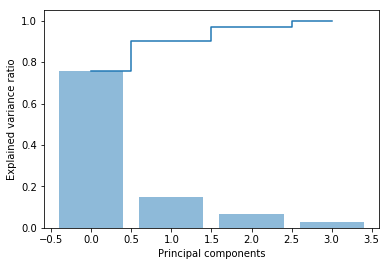

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(X_train1)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()


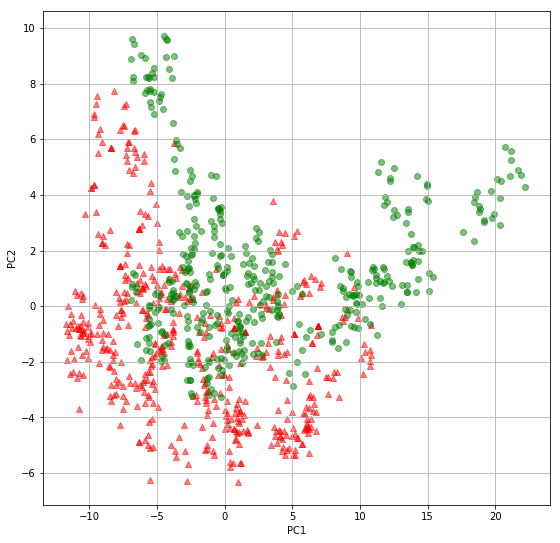

In [23]:
pca = PCA(n_components=2)
X_train_pca1 = pca.fit_transform(X_train1)
print

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca1[y_train1 == 0, 0], X_train_pca1[y_train1 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca1[y_train1 == 1, 0], X_train_pca1[y_train1 == 1, 1],
              color='green', marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# plt.savefig('./figures/half_moon_2.png', dpi=300)
ax.grid()
plt.show()

In [24]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-0.13325425 -0.80758456  0.55633527  0.14332326]
 [-0.80495755  0.2550914   0.2930206  -0.44845361]]
singular_ values
 [218.1329195   96.27388312]


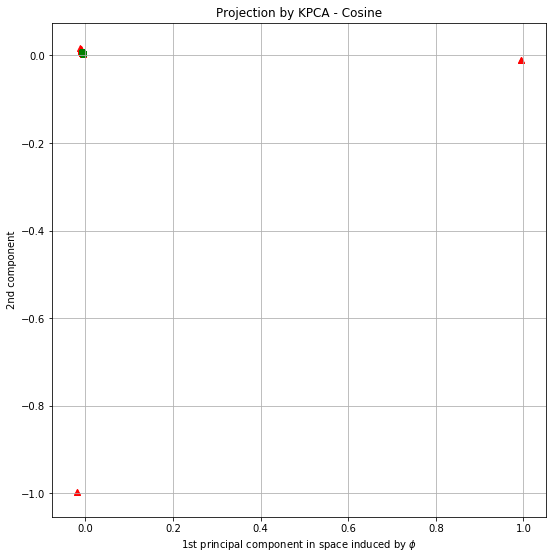

            0         1
0   -0.008937  0.010179
1   -0.006030  0.005114
2   -0.005158  0.004157
3   -0.006007  0.005121
4   -0.004772  0.003706
5   -0.005212  0.004180
6   -0.005394  0.004390
7   -0.004630  0.003568
8   -0.006490  0.005706
9   -0.007197  0.006710
10  -0.004450  0.003372
11  -0.004533  0.003457
12  -0.004614  0.003545
13  -0.004486  0.003408
14  -0.004653  0.003591
15  -0.004449  0.003370
16  -0.004550  0.003478
17  -0.004478  0.003399
18  -0.004729  0.003664
19  -0.004504  0.003426
20  -0.005042  0.003996
21  -0.005378  0.004373
22  -0.004543  0.003466
23  -0.004451  0.003373
24  -0.008937  0.010179
25  -0.004449  0.003370
26  -0.004467  0.003389
27  -0.006140  0.005318
28  -0.004453  0.003375
29  -0.006167  0.005286
..        ...       ...
930 -0.004506  0.003428
931 -0.004847  0.003786
932 -0.005302  0.004291
933 -0.004992  0.003959
934 -0.004509  0.003432
935 -0.005049  0.004034
936 -0.004582  0.003529
937 -0.004449  0.003370
938 -0.004620  0.003564
939 -0.004622  0

In [25]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)
X_train_kpca1 = kpca.fit_transform(X_train1)
fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca1[y_train1 == 0, 0], X_train_kpca1[y_train1 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca1[y_train1 == 1, 0], X_train_kpca1[y_train1 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.title("Projection by KPCA - Cosine")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()

X_train1_v2 = pd.DataFrame(data=X_train_kpca1)
print(X_train1_v2)

### Nursery

Explained variance ratio: [0.26983282 0.16949385 0.16686609 0.09174771 0.09064817 0.08969106
 0.08803083 0.03368947]


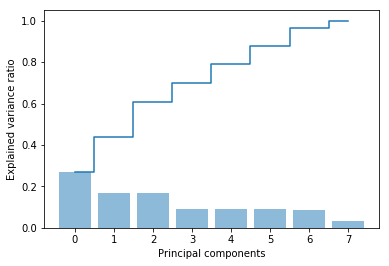

In [26]:
pca = PCA()
principalComponents = pca.fit_transform(X_train2)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()


In [27]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[ 2.84690472e-03  9.99896289e-01  1.29214850e-02 -4.75573447e-03
   2.39786078e-03 -1.22617257e-03 -5.67721708e-04 -1.46566495e-03]
 [-3.17572946e-03  8.10986666e-03 -2.74582928e-01  9.61415572e-01
   9.50389090e-03 -9.50832228e-05  1.06188749e-02 -2.31617912e-03]
 [-3.01263275e-03  1.10520537e-02 -9.61050119e-01 -2.74576901e-01
   1.23240812e-02 -2.73293029e-04 -1.60876618e-02 -2.11707295e-02]
 [ 5.19267742e-01 -3.49144232e-03  1.62897146e-02  7.82145304e-03
   5.50449437e-01  1.80169461e-03 -6.44774021e-01 -1.06258767e-01]
 [-6.97355557e-01 -2.24142184e-04  1.74021062e-02 -5.03172551e-03
   6.58790407e-01 -3.94310464e-04  4.69566667e-02 -2.77771744e-01]
 [ 3.70446183e-01 -2.19227298e-03  1.03011663e-02 -2.88085832e-03
   1.67903878e-02 -9.13822180e-03  4.47017476e-01 -8.13916678e-01]
 [-3.26796614e-01  9.81363817e-04  1.20658690e-02  1.30465768e-02
  -5.12316876e-01 -1.75417605e-03 -6.17938156e-01 -4.98565931e-01]
 [-1.60386305e-03 -1.21778287e-03  1.80108061e-04  8.97

In [28]:
# Only two components for illustration
pca = PCA(n_components=7)
X_train_pca2 = pca.fit_transform(X_train2)
print(pca)

print(X_train_pca2)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[-1.00610072  0.59124223  0.33623871 ... -0.71587908 -0.46231896
   1.13145535]
 [-0.98927946  0.35912593 -0.61144114 ...  0.99039461  1.28037639
  -0.62017709]
 [ 1.9874076  -0.05672504  1.57680165 ... -0.99869642 -0.46511694
  -0.84808476]
 ...
 [ 0.00460498  1.31143448 -0.93237086 ... -0.9261564   0.01026392
  -1.41600657]
 [-0.97277393 -0.88628138 -1.30996514 ...  0.35443234  1.28590625
  -0.10708674]
 [ 0.99031809 -1.01013969  1.8484222  ...  0.02864341  0.43044417
  -0.65468831]]


In [29]:
'''
pca = PCA(n_components=7)
X_spca2 = pca.fit_transform(X_train2)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca2[y_train2 == 0, 0], X_train_pca2[y_train2 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 1, 0], X_train_pca2[y_train2 == 1, 1],
              color='green', marker='o', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 2, 0], X_train_pca2[y_train2 == 2, 1],
              color='cyan', marker='x', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 3, 0], X_train_pca2[y_train2 == 3, 1],
              color='blue', marker='s', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 4, 0], X_train_pca2[y_train2 == 4, 1],
              color='yellow', marker='*', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# plt.savefig('./figures/half_moon_2.png', dpi=300)
ax.grid()
plt.show()
'''

"\npca = PCA(n_components=7)\nX_spca2 = pca.fit_transform(X_train2)\n\nfig = plt.figure(figsize=(20, 20))\nax = fig.add_subplot(2,2,1) \n\nax.scatter(X_train_pca2[y_train2 == 0, 0], X_train_pca2[y_train2 == 0, 1],\n              color='red', marker='^', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 1, 0], X_train_pca2[y_train2 == 1, 1],\n              color='green', marker='o', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 2, 0], X_train_pca2[y_train2 == 2, 1],\n              color='cyan', marker='x', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 3, 0], X_train_pca2[y_train2 == 3, 1],\n              color='blue', marker='s', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 4, 0], X_train_pca2[y_train2 == 4, 1],\n              color='yellow', marker='*', alpha=0.5)\n\nax.set_xlabel('PC1')\nax.set_ylabel('PC2')\n\n# plt.savefig('./figures/half_moon_2.png', dpi=300)\nax.grid()\nplt.show()\n"

In [30]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 7 ,kernel="rbf", fit_inverse_transform=True, gamma=10)
X_train_kpca2 = kpca.fit_transform(X_train2)

'''
fig= plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",
            marker='x', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",
            marker='s', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",
            marker='*', alpha=0.5)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()
'''
X_train2_v2 = pd.DataFrame(data=X_train_kpca2)

## Task B - Predictive Model

In [31]:
# Save banknotes training and test sets
#X_train1.to_pickle('./X_train_banknotes.pkl')
#X_test1.to_pickle('./X_test_banknotes.pkl')
#y_train1.to_pickle('./y_train_banknotes.pkl')
#y_test1.to_pickle('./y_test_banknotes.pkl')

# Save nursery training and test sets
#X_train2.to_pickle('./X_train_nursery.pkl')
#X_test2.to_pickle('./X_test_nursery.pkl')
#y_train2.to_pickle('./y_train_nursery.pkl')
#y_test2.to_pickle('./y_test_nursery.pkl')

In [32]:
# Load banknotes training and test sets
#X_train1 = pd.read_pickle('./X_train_banknotes.pkl')
#X_test1 = pd.read_pickle('./X_test_banknotes.pkl')
#y_train1 = pd.read_pickle('./y_train_banknotes.pkl')
#y_test1 = pd.read_pickle('./y_test_banknotes.pkl')

# Load nursery training and test sets
#X_train2 = pd.read_pickle('./X_train_nursery.pkl')
#X_test2 = pd.read_pickle('./X_test_nursery.pkl')
#y_train2 = pd.read_pickle('./y_train_nursery.pkl')
#y_test2 = pd.read_pickle('./y_test_nursery.pkl')

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, banknotes, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    if(banknotes == 1): # banknotes dataset
        Xpred = np.array([xx1.ravel(), xx2.ravel()] + [np.repeat(0, xx1.ravel().size) for _ in range(2)]).T
    else: # nursery dataset
        Xpred = np.array([xx1.ravel(), xx2.ravel()] + [np.repeat(0, xx1.ravel().size) for _ in range(6)]).T
    
    Z = classifier.predict(Xpred)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

### MLP

In [34]:
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import accuracy_score

# Banknotes dataset

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp

#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter = 500)
#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=500, alpha=0.0001,
 #   solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
#mlp.fit(X_train1, y_train1)

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
# Código que encontrei online
#y_pred = mlp.predict(X_test1)
#accuracy_score(y_test1, y_pred)

In [36]:
# Banknotes dataset
print(X_train1_v2)
mlp.fit(X_train1_v2.values,y_train1.values)
plot_decision_regions(X_train1_v2.values, y_train1.values, classifier=mlp, banknotes=1)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

            0         1
0   -0.008937  0.010179
1   -0.006030  0.005114
2   -0.005158  0.004157
3   -0.006007  0.005121
4   -0.004772  0.003706
5   -0.005212  0.004180
6   -0.005394  0.004390
7   -0.004630  0.003568
8   -0.006490  0.005706
9   -0.007197  0.006710
10  -0.004450  0.003372
11  -0.004533  0.003457
12  -0.004614  0.003545
13  -0.004486  0.003408
14  -0.004653  0.003591
15  -0.004449  0.003370
16  -0.004550  0.003478
17  -0.004478  0.003399
18  -0.004729  0.003664
19  -0.004504  0.003426
20  -0.005042  0.003996
21  -0.005378  0.004373
22  -0.004543  0.003466
23  -0.004451  0.003373
24  -0.008937  0.010179
25  -0.004449  0.003370
26  -0.004467  0.003389
27  -0.006140  0.005318
28  -0.004453  0.003375
29  -0.006167  0.005286
..        ...       ...
930 -0.004506  0.003428
931 -0.004847  0.003786
932 -0.005302  0.004291
933 -0.004992  0.003959
934 -0.004509  0.003432
935 -0.005049  0.004034
936 -0.004582  0.003529
937 -0.004449  0.003370
938 -0.004620  0.003564
939 -0.004622  0

ValueError: shapes (22801,4) and (2,10) not aligned: 4 (dim 1) != 2 (dim 0)

In [ ]:
# Banknotes dataset

print('Banknotes dataset')
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

In [ ]:
# Nursery dataset

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp

In [ ]:
# Nursery dataset

mlp.fit(X_train2.values,y_train2.values)
plot_decision_regions(X_train2.values, y_train2.values, classifier=mlp, banknotes=0)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Nursery dataset

print('Nursery dataset')
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

### SVM

In [ ]:
from sklearn.svm import SVC

# Banknotes dataset

svm=SVC(C=1.0,kernel='rbf', max_iter=2000, tol=1e-05, verbose=0)
svm

In [ ]:
# Banknotes dataset

svm=svm.fit(X_train1.values, y_train1.values)
plot_decision_regions(X_train1.values, y_train1.values, classifier=svm, banknotes=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Banknotes dataset

print('Banknotes dataset')
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)

In [ ]:
# Nursery dataset

svm=SVC(C=1.0,kernel='rbf', max_iter=4000, tol=1e-05, verbose=0)
svm

In [ ]:
# Nursery dataset

svm=svm.fit(X_train2.values, y_train2.values)
plot_decision_regions(X_train2.values, y_train2.values, classifier=svm, banknotes=0)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Nursery dataset

print('Nursery dataset')
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)